In [1]:
import reservoirpy as rpy
import numpy as np
import matplotlib.pyplot as plt
from reservoirpy.nodes import Reservoir
from reservoirpy.nodes import Reservoir, Ridge, FORCE, ESN, concat, Input

In [2]:
rpy.verbosity(0)  # no need to be too verbose here
rpy.set_seed(50)  # make everyhting reproducible !

lr: the leaking rate, which controls the time constant of the neurons; 

sr: the spectral radius of the recurrent connections in the reservoir. It controls the chaoticity of the reservoir dynamics.

In [3]:
reservoir = Reservoir(100, lr=0.5, sr=0.9)

Create sine wave 

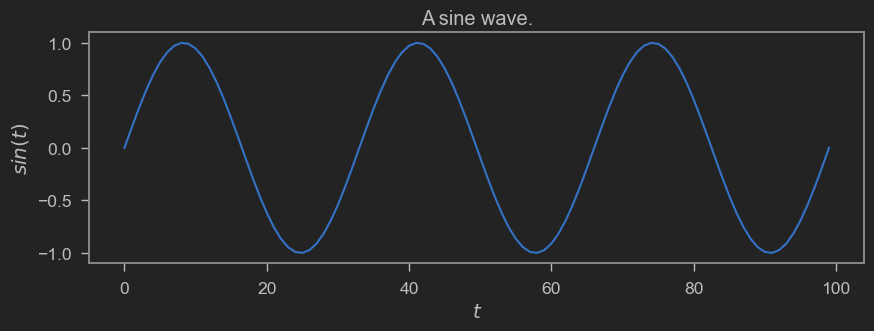

In [7]:
X = np.sin(np.linspace(0, 6*np.pi, 100)).reshape(-1, 1)

plt.figure(figsize=(10, 3))
plt.title("A sine wave.")
plt.ylabel("$sin(t)$")
plt.xlabel("$t$")
plt.plot(X)
plt.show()

In [8]:
s = reservoir(X[0].reshape(1, -1))

print("New state vector shape: ", s.shape)

New state vector shape:  (1, 100)


In [9]:
s = reservoir.state()

In [10]:
states = np.empty((len(X), reservoir.output_dim))
for i in range(len(X)):
    states[i] = reservoir(X[i].reshape(1, -1))

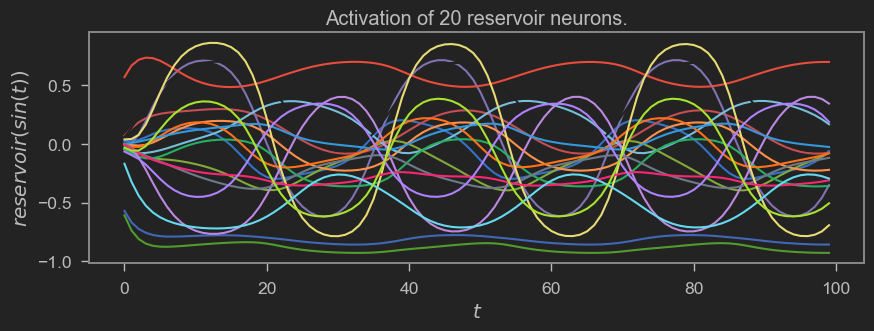

In [11]:
plt.figure(figsize=(10, 3))
plt.title("Activation of 20 reservoir neurons.")
plt.ylabel("$reservoir(sin(t))$")
plt.xlabel("$t$")
plt.plot(states[:, :20])
plt.show()


In [12]:
states = reservoir.run(X)

In [13]:
reservoir = reservoir.reset()

In [14]:
states_from_null = reservoir.run(X, reset=True)

In [15]:
a_state_vector = np.random.uniform(-1, 1, size=(1, reservoir.output_dim))

states_from_a_starting_state = reservoir.run(X, from_state=a_state_vector)


In [16]:
previous_states = reservoir.run(X)

with reservoir.with_state(reset=True):
    states_from_null = reservoir.run(X)

# as if the with_state never happened !
states_from_previous = reservoir.run(X)

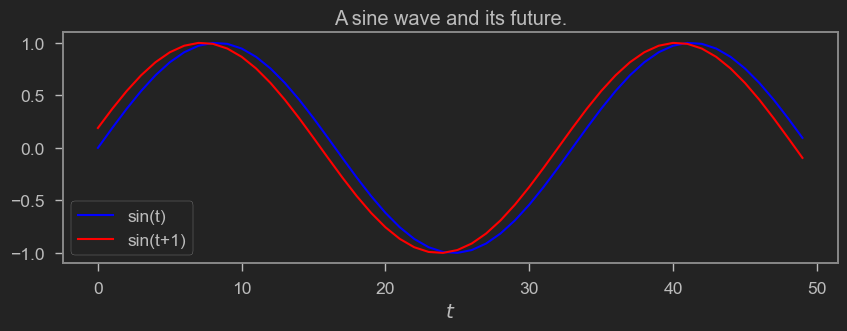

In [19]:
X_train = X[:50]
Y_train = X[1:51]

plt.figure(figsize=(10, 3))
plt.title("A sine wave and its future.")
plt.xlabel("$t$")
plt.plot(X_train, label="sin(t)", color="blue")
plt.plot(Y_train, label="sin(t+1)", color="red")
plt.legend()
plt.show()


In [22]:
readout = Ridge(ridge=1e-7)

In [23]:
train_states = reservoir.run(X_train, reset=True)

In [24]:
readout = readout.fit(train_states, Y_train, warmup=10)

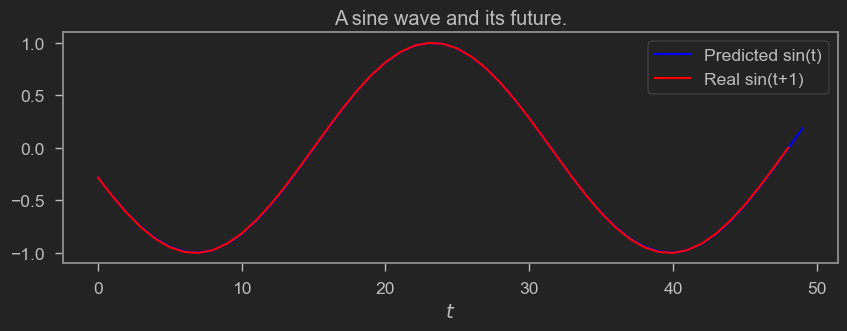

In [25]:
test_states = reservoir.run(X[50:])
Y_pred = readout.run(test_states)

plt.figure(figsize=(10, 3))
plt.title("A sine wave and its future.")
plt.xlabel("$t$")
plt.plot(Y_pred, label="Predicted sin(t)", color="blue")
plt.plot(X[51:], label="Real sin(t+1)", color="red")
plt.legend()
plt.show()


In [43]:
reservoir = Reservoir(100, lr=0.5, sr=0.9)
ridge = Ridge(ridge=1e-7)

esn_model = reservoir >> ridge

In [44]:
esn_model = esn_model.fit(X_train, Y_train, warmup=10)

warmup_y = esn_model.run(X_train[:-10], reset=True)

In [45]:
Y_pred = np.empty((100, 1))
x = warmup_y[-1].reshape(1, -1)

for i in range(100):
    x = esn_model(x)
    Y_pred[i] = x


In [46]:
print(reservoir.is_initialized, readout.is_initialized, readout.fitted)

True True True


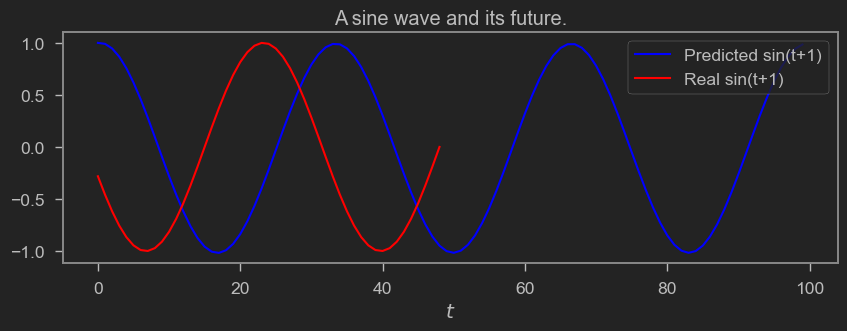

In [47]:
#Y_pred = esn_model.run(X[50:])

plt.figure(figsize=(10, 3))
plt.title("A sine wave and its future.")
plt.xlabel("$t$")
plt.plot(Y_pred, label="Predicted sin(t+1)", color="blue")
plt.plot(X[51:], label="Real sin(t+1)", color="red")
plt.legend()
plt.show()

